# Исследовательский анализ данных

## Описание проекта

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:  
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;  
- Контролировать добросовестность кассиров при продаже алкоголя.  

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.


## Описание данных

Данные взяты с сайта *ChaLearn Looking at People*. Они находятся в папке */datasets/faces/*.  
В вашем распоряжении одна папка со всеми изображениями *(/final_files)* и CSV-файл l*abels.csv* с двумя колонками: *file_name* и *real_age*.  

## Исследовательский анализ данных

Импорт библиотек

In [3]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Загрузка датасета

In [6]:
labels = pd.read_csv('labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


Посмотрим на структуру данных

In [11]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [12]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [13]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Построим график распределения возраста в выборке

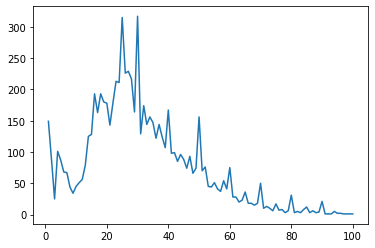

In [20]:
labels['real_age'].value_counts().sort_index(ascending=False).plot(
     kind='line');
xticks=range(0,max(labels['real_age']),5),
xlim=(1,max(labels['real_age']))
plt.show();

Напечатаем 16 фотографий из датасета с целевым признаком

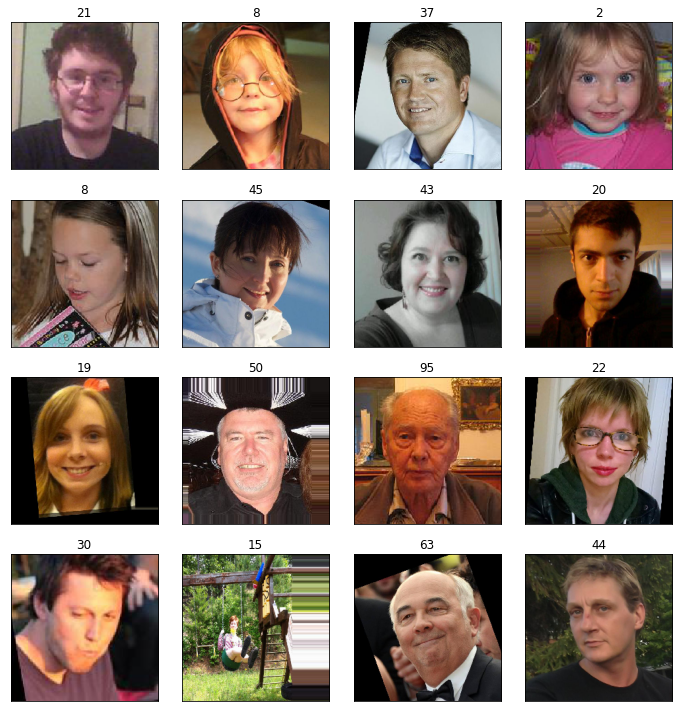

In [18]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(0, 16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.title(target[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

## Вывод по анализу данных

Имеем датасет из 7591 строк.  
Дубликатов и пропущенных значений нет.  
Самый частовстречающийся возраст в диапазоне от 20 до 40 лет. Так же на каждкю круглую дату видны небольшие выбросы. 
Многие из фотографий перевернуты или сдвинуты.
В маркировке возрастов явных ошибок не наблюдается.  
Предполагаю, что модель обучится хорошо на таких данных. 

## Обучение модели

## Анализ обученной модели

Модель не переобучена, так как потери и MAE уменьшаются как на обучающей, так и на валидационной выборках. 

В данном проекте была обучена модель с использованием архитектуры ResNet50.   
Так же к ней были добавлены слои GlobalAveragePooling2D, Flatten и Dense с функцией активации ReLu.  
Так же был использован оптимайзер Adam с learning rate = 0.0001.  
Модель была обучена на 5 эпохах.   
MAE на тестовой выборке 7.0459, что является достаточно хорошим результатом. 